First, I will remake the original dataset, including minutes and points per minute (per game). Reminder that this is more or less recreating and expanding the analysis from Lev Akabas found here: https://www.sportico.com/leagues/basketball/2024/shai-gilgeous-alexander-consistency-2024-nba-playoffs-1234776899/

In [ ]:
"""get all players who qualified for league leaders the last 2 years"""
from nba_api.stats.endpoints import leagueleaders
league_leaders = leagueleaders.LeagueLeaders(per_mode48='PerGame', season='2022-23').get_data_frames()[0]
scorers_2223 = league_leaders[['PLAYER_ID','RANK','PLAYER','TEAM_ID','GP', 'MIN', 'PTS']]
from nba_api.stats.endpoints import leagueleaders
league_leaders = leagueleaders.LeagueLeaders(per_mode48='PerGame', season='2023-24').get_data_frames()[0]
scorers_2324 = league_leaders[['PLAYER_ID','RANK','PLAYER','TEAM_ID','GP', 'MIN', 'PTS']]

In [ ]:
"""loop to get ID, name, ppg, std, cv for each scorer in a dict"""
#this is likely to fail without sleeps. Probably less would work (although maybe higher than 30), but I know time.sleep(45) works and i did 50 indexes at a time
import time

scorers_dict_2223 = {}
from nba_api.stats.endpoints import playergamelog
for scorer in scorers_2223.index:
    id = scorers_2223.loc[scorer, 'PLAYER_ID'].item()
    name = scorers_2223.loc[scorer, 'PLAYER']
    gamelog = playergamelog.PlayerGameLog(player_id=id, season='2022-23').get_data_frames()[0]

    gamelog['PPM'] = gamelog['PTS'] / gamelog['MIN']

    ppg_ave = gamelog['PTS'].mean()
    ppg_std = gamelog['PTS'].std()
    ppg_cv = ppg_std / ppg_ave

    mpg_ave = gamelog['MIN'].mean()
    mpg_std = gamelog['MIN'].std()
    mpg_cv = mpg_std / mpg_ave

    ppm_ave = gamelog['PPM'].mean()
    ppm_std = gamelog['PPM'].std()
    ppm_cv = ppm_std / ppm_ave

    time.sleep(45)

    scorers_dict_2223.update({f"{name}": [id, ppg_ave, ppg_std, ppg_cv, mpg_ave, mpg_std, mpg_cv, ppm_ave, ppm_std, ppm_cv]})

#import time (when api-limited, time.sleep(45) works and I did 50 indexes at a time (currently set to the final set of indexes)
scorers_dict_2324 = {}
from nba_api.stats.endpoints import playergamelog
for scorer in scorers_2324.index:
    id = scorers_2324.loc[scorer, 'PLAYER_ID'].item()
    name = scorers_2324.loc[scorer, 'PLAYER']
    gamelog = playergamelog.PlayerGameLog(player_id=id, season='2023-24').get_data_frames()[0]

    gamelog['PPM'] = gamelog['PTS'] / gamelog['MIN']

    ppg_ave = gamelog['PTS'].mean()
    ppg_std = gamelog['PTS'].std()
    ppg_cv = ppg_std / ppg_ave

    mpg_ave = gamelog['MIN'].mean()
    mpg_std = gamelog['MIN'].std()
    mpg_cv = mpg_std / mpg_ave

    ppm_ave = gamelog['PPM'].mean()
    ppm_std = gamelog['PPM'].std()
    ppm_cv = ppm_std / ppm_ave

    time.sleep(45)

    scorers_dict_2324.update({f"{name}": [id, ppg_ave, ppg_std, ppg_cv, mpg_ave, mpg_std, mpg_cv, ppm_ave, ppm_std, ppm_cv]})

#delete some variables

In [ ]:
"""turn the dicts into dfs"""
import pandas as pd
headers = ['name', 'player_id', 'ppg_ave', 'ppg_std', 'ppg_cv', 'mpg_ave', 'mpg_std', 'mpg_cv', 'ppm_ave', 'ppm_std', 'ppm_cv']
scorers_summary_2223 = pd.DataFrame([[k] + v for k,v in scorers_dict_2223.items()], columns=headers)
scorers_summary_2223['year'] = '2022-23'

scorers_summary_2324 = pd.DataFrame([[k] + v for k,v in scorers_dict_2324.items()], columns=headers)
scorers_summary_2324['year'] = '2023-24'

"combine the dfs into one"
scorers_summary = pd.concat([scorers_summary_2223, scorers_summary_2324]).reset_index(drop=True)

"""for the console/jupyter transition"""
scorers_summary.to_csv('scorers_summary_with_minutes.csv')

In [5]:
"""ONLY FOR JUPYTER - did all of the above in console, here will upload the resulting table"""
import pandas as pd
scorers_summary = pd.read_csv('scorers_summary_with_minutes.csv', index_col=0)


In [15]:
round(scorers_summary.sort_values(by=['ppg_ave'], ascending=False), 2).head(10)

,name,player_id,ppg_ave,ppg_std,ppg_cv,mpg_ave,mpg_std,mpg_cv,ppm_ave,ppm_std,ppm_cv,year
245,Luka Doncic,1629029,33.86,8.81,0.26,37.49,4.39,0.12,0.91,0.22,0.24,2023-24
0,Joel Embiid,203954,33.08,8.85,0.27,34.67,4.74,0.14,0.96,0.24,0.25,2022-23
1,Luka Doncic,1629029,32.39,9.76,0.30,36.20,7.05,0.19,0.89,0.24,0.27,2022-23
2,Damian Lillard,203081,32.17,10.59,0.33,36.43,4.20,0.12,0.88,0.27,0.31,2022-23
3,Shai Gilgeous-Alexander,1628983,31.40,6.73,0.21,35.54,3.50,0.10,0.88,0.18,0.20,2022-23
4,Giannis Antetokounmpo,203507,31.10,10.74,0.35,32.16,6.46,0.20,0.96,0.29,0.30,2022-23
246,Giannis Antetokounmpo,203507,30.44,9.12,0.30,35.25,4.64,0.13,0.86,0.23,0.26,2023-24
5,Jayson Tatum,1628369,30.07,8.48,0.28,36.93,4.59,0.12,0.82,0.23,0.29,2022-23
247,Shai Gilgeous-Alexander,1628983,30.05,6.97,0.23,34.05,4.84,0.14,0.89,0.20,0.22,2023-24
248,Jalen Brunson,1628973,28.73,10.12,0.35,35.44,5.61,0.16,0.80,0.25,0.32,2023-24


In [17]:
scorers_summary.isna().any()

name         False
player_id    False
ppg_ave      False
ppg_std      False
ppg_cv       False
mpg_ave      False
mpg_std      False
mpg_cv       False
ppm_ave      False
ppm_std       True
ppm_cv        True
year         False
dtype: bool

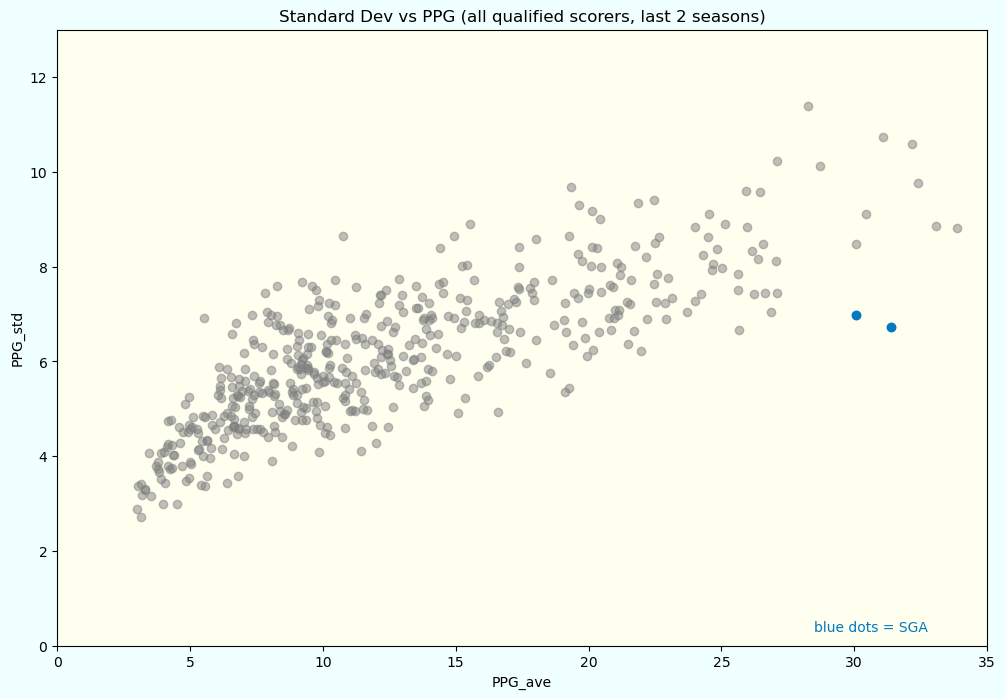

In [31]:
"""remaking the ppg_std vs ppg_ave from previous"""
"""scatterplots"""
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8), dpi= 100, facecolor=('azure'))
ax.set_facecolor('ivory')

plt.scatter(x='ppg_ave', y='ppg_std', data=scorers_summary, color='grey', alpha=.5)

plt.scatter(x=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2022-23')]['ppg_ave'].item(),
            y=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2022-23')]['ppg_std'].item(),
            data=scorers_summary, color='#007AC1')

plt.scatter(x=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2023-24')]['ppg_ave'].item(),
            y=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2023-24')]['ppg_std'].item(),
            data=scorers_summary, color='#007AC1')

plt.annotate("blue dots = SGA", xy=(scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2022-23')]['ppg_ave'].item(),
                        scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2022-23')]['ppg_std'].item()),
             xytext=(28.5,.3),
             color='#007AC1', fontsize=10)

plt.xlim(0,35)
plt.ylim(0,13)
plt.xlabel("PPG_ave")
plt.ylabel("PPG_std")
plt.title("Standard Dev vs PPG (all qualified scorers, last 2 seasons)")
plt.show()

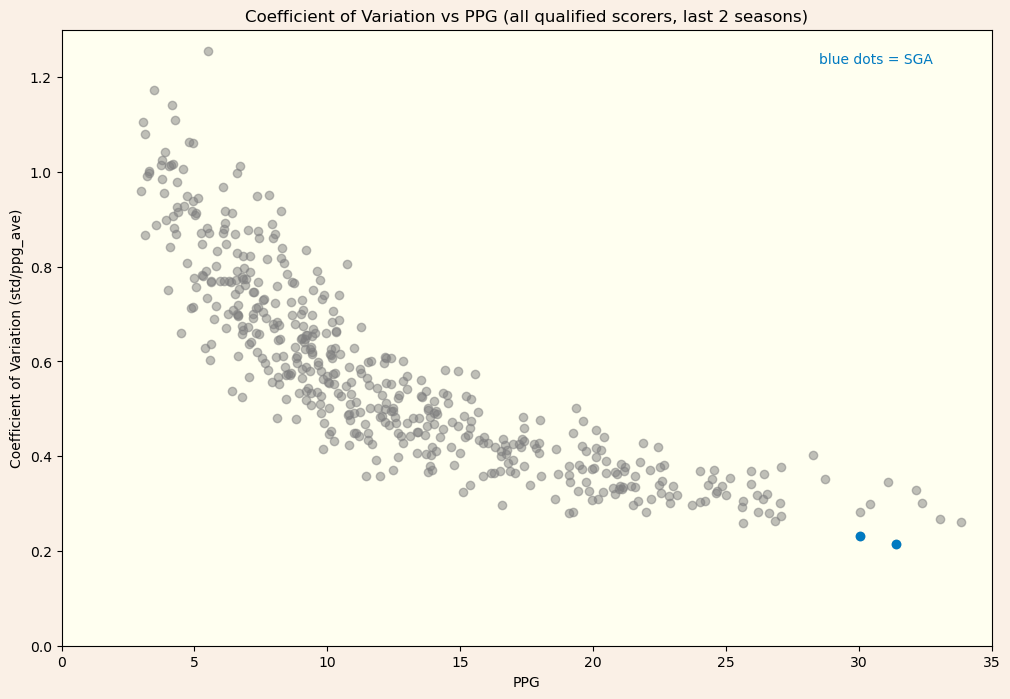

In [42]:
"""scatterplots"""
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8), dpi= 100, facecolor=('linen'))
ax.set_facecolor('ivory')

plt.scatter(x='ppg_ave', y='ppg_cv', data=scorers_summary, color='grey', alpha=.5)

plt.scatter(x=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2022-23')]['ppg_ave'].item(),
            y=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2022-23')]['ppg_cv'].item(),
            data=scorers_summary, color='#007AC1')

plt.scatter(x=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2023-24')]['ppg_ave'].item(),
            y=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2023-24')]['ppg_cv'].item(),
            data=scorers_summary, color='#007AC1')

plt.annotate("blue dots = SGA", xy=(28.5, 1.3),
             xytext=(28.5,1.23),
             color='#007AC1', fontsize=10)

plt.xlim(0,35)
plt.ylim(0,1.3)
plt.xlabel("PPG")
plt.ylabel("Coefficient of Variation (std/ppg_ave)")
plt.title("Coefficient of Variation vs PPG (all qualified scorers, last 2 seasons)")
plt.show()

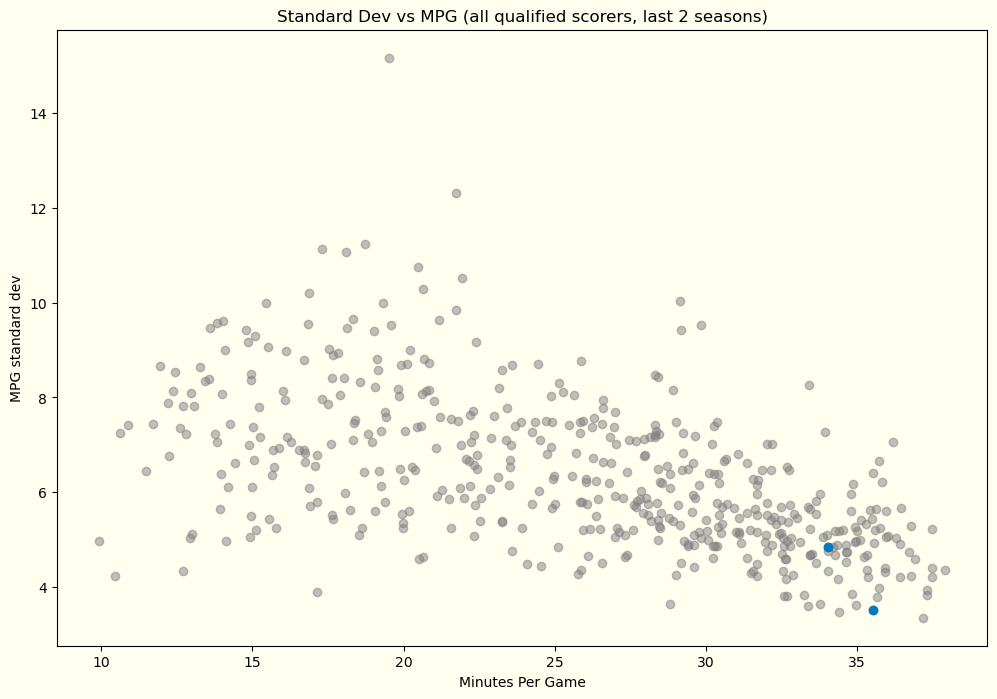

In [44]:
"""scatterplots"""
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8), dpi= 100, facecolor=('ivory'))
ax.set_facecolor('ivory')

plt.scatter(x='mpg_ave', y='mpg_std', data=scorers_summary, color='grey', alpha=.5)

plt.scatter(x=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2022-23')]['mpg_ave'].item(),
            y=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2022-23')]['mpg_std'].item(),
            data=scorers_summary, color='#007AC1')

plt.scatter(x=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2023-24')]['mpg_ave'].item(),
            y=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2023-24')]['mpg_std'].item(),
            data=scorers_summary, color='#007AC1')

#plt.annotate("blue dots = SGA", xy=(28.5, 1.3),
             #xytext=(28.5,1.23),
             #color='#007AC1', fontsize=10)

#plt.xlim(0,35)
#plt.ylim(0,1.3)
plt.xlabel("Minutes Per Game")
plt.ylabel("MPG standard dev")
plt.title("Standard Dev vs MPG (all qualified scorers, last 2 seasons)")
plt.show()

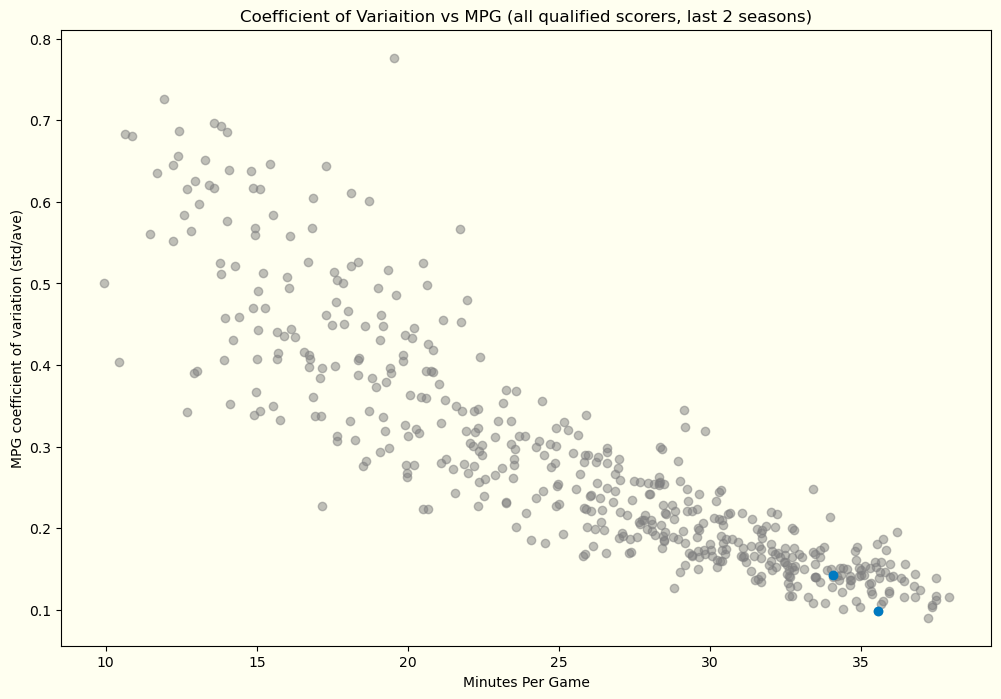

In [46]:
"""scatterplots"""
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8), dpi= 100, facecolor=('ivory'))
ax.set_facecolor('ivory')

plt.scatter(x='mpg_ave', y='mpg_cv', data=scorers_summary, color='grey', alpha=.5)

plt.scatter(x=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2022-23')]['mpg_ave'].item(),
            y=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2022-23')]['mpg_cv'].item(),
            data=scorers_summary, color='#007AC1')

plt.scatter(x=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2023-24')]['mpg_ave'].item(),
            y=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2023-24')]['mpg_cv'].item(),
            data=scorers_summary, color='#007AC1')

#plt.annotate("blue dots = SGA", xy=(28.5, 1.3),
             #xytext=(28.5,1.23),
             #color='#007AC1', fontsize=10)

#plt.xlim(0,35)
#plt.ylim(0,1.3)
plt.xlabel("Minutes Per Game")
plt.ylabel("MPG coefficient of variation (std/ave)")
plt.title("Coefficient of Variaition vs MPG (all qualified scorers, last 2 seasons)")
plt.show()

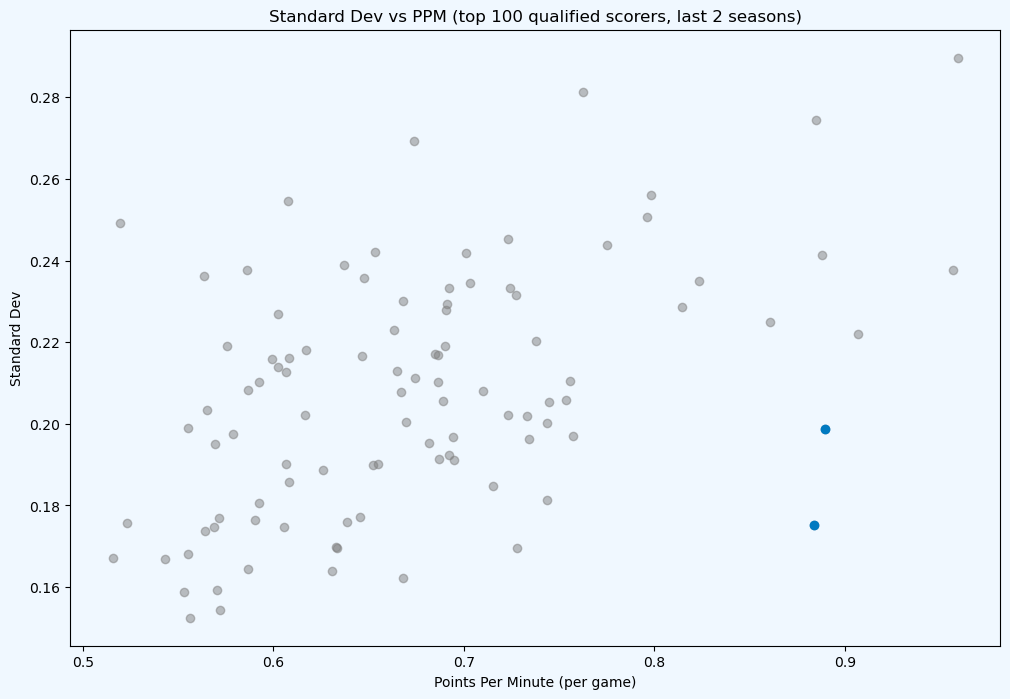

In [51]:
"""scatterplots"""
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8), dpi= 100, facecolor=('aliceblue'))
ax.set_facecolor('aliceblue')

plt.scatter(x='ppm_ave', y='ppm_std', data=scorers_summary.sort_values(by=['ppg_ave'], ascending=False)[0:100], color='grey', alpha=.5)

plt.scatter(x=scorers_summary.sort_values(by=['ppg_ave'], ascending=False)[0:100][(scorers_summary.sort_values(by=['ppg_ave'], ascending=False)[0:100]['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary.sort_values(by=['ppg_ave'], ascending=False)[0:100]['year'] == '2022-23')]['ppm_ave'].item(),
            y=scorers_summary.sort_values(by=['ppg_ave'], ascending=False)[0:100][(scorers_summary.sort_values(by=['ppg_ave'], ascending=False)[0:100]['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary.sort_values(by=['ppg_ave'], ascending=False)[0:100]['year'] == '2022-23')]['ppm_std'].item(),
            data=scorers_summary.sort_values(by=['ppg_ave'], ascending=False)[0:100], color='#007AC1')

plt.scatter(x=scorers_summary.sort_values(by=['ppg_ave'], ascending=False)[0:100][(scorers_summary.sort_values(by=['ppg_ave'], ascending=False)[0:100]['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary.sort_values(by=['ppg_ave'], ascending=False)[0:100]['year'] == '2023-24')]['ppm_ave'].item(),
            y=scorers_summary.sort_values(by=['ppg_ave'], ascending=False)[0:100][(scorers_summary.sort_values(by=['ppg_ave'], ascending=False)[0:100]['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary.sort_values(by=['ppg_ave'], ascending=False)[0:100]['year'] == '2023-24')]['ppm_std'].item(),
            data=scorers_summary.sort_values(by=['ppg_ave'], ascending=False)[0:100], color='#007AC1')

#plt.annotate("blue dots = SGA", xy=(28.5, 1.3),
             #xytext=(28.5,1.23),
             #color='#007AC1', fontsize=10)

#plt.xlim(0,35)
#plt.ylim(0,1.3)
plt.xlabel("Points Per Minute (per game)")
plt.ylabel("Standard Dev")
plt.title("Standard Dev vs PPM (top 100 qualified scorers, last 2 seasons)")
plt.show()

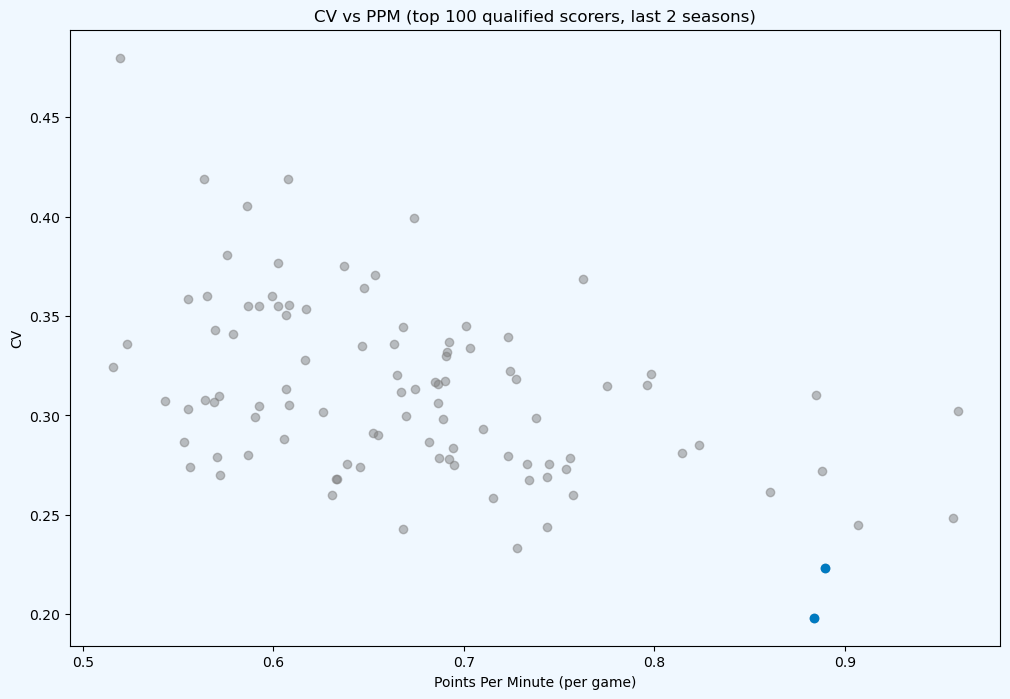

In [53]:
"""scatterplots"""
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8), dpi= 100, facecolor=('aliceblue'))
ax.set_facecolor('aliceblue')

plt.scatter(x='ppm_ave', y='ppm_cv', data=scorers_summary.sort_values(by=['ppg_ave'], ascending=False)[0:100], color='grey', alpha=.5)

plt.scatter(x=scorers_summary.sort_values(by=['ppg_ave'], ascending=False)[0:100][(scorers_summary.sort_values(by=['ppg_ave'], ascending=False)[0:100]['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary.sort_values(by=['ppg_ave'], ascending=False)[0:100]['year'] == '2022-23')]['ppm_ave'].item(),
            y=scorers_summary.sort_values(by=['ppg_ave'], ascending=False)[0:100][(scorers_summary.sort_values(by=['ppg_ave'], ascending=False)[0:100]['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary.sort_values(by=['ppg_ave'], ascending=False)[0:100]['year'] == '2022-23')]['ppm_cv'].item(),
            data=scorers_summary.sort_values(by=['ppg_ave'], ascending=False)[0:100], color='#007AC1')

plt.scatter(x=scorers_summary.sort_values(by=['ppg_ave'], ascending=False)[0:100][(scorers_summary.sort_values(by=['ppg_ave'], ascending=False)[0:100]['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary.sort_values(by=['ppg_ave'], ascending=False)[0:100]['year'] == '2023-24')]['ppm_ave'].item(),
            y=scorers_summary.sort_values(by=['ppg_ave'], ascending=False)[0:100][(scorers_summary.sort_values(by=['ppg_ave'], ascending=False)[0:100]['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary.sort_values(by=['ppg_ave'], ascending=False)[0:100]['year'] == '2023-24')]['ppm_cv'].item(),
            data=scorers_summary.sort_values(by=['ppg_ave'], ascending=False)[0:100], color='#007AC1')

#plt.annotate("blue dots = SGA", xy=(28.5, 1.3),
             #xytext=(28.5,1.23),
             #color='#007AC1', fontsize=10)

#plt.xlim(0,35)
#plt.ylim(0,1.3)
plt.xlabel("Points Per Minute (per game)")
plt.ylabel("CV")
plt.title("CV vs PPM (top 100 qualified scorers, last 2 seasons)")
plt.show()

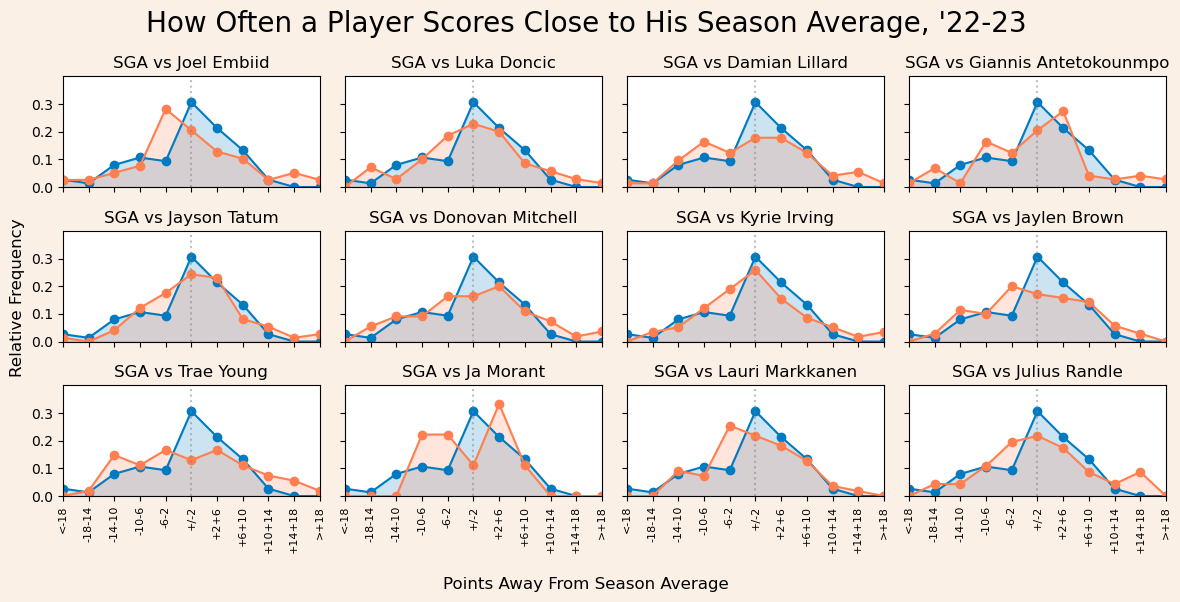

In [56]:
"""gamelog distributions for 2022-23"""

"""get top 13 (12 + Shai) qualified scorers from 2022-23"""
topscorers_2223 = scorers_summary[scorers_summary['year'] == '2022-23'].sort_values(by=['ppg_ave'], ascending=False)[0:13]


"""get info for Shai's distribution and calc pts off average"""
shai_ID = topscorers_2223[topscorers_2223['name'] == 'Shai Gilgeous-Alexander']['player_id'].item()
from nba_api.stats.endpoints import playergamelog
shai_log = playergamelog.PlayerGameLog(player_id=shai_ID).get_data_frames()[0]
shai_avg = shai_log['PTS'].mean()
shai_log['PTS_diff'] = shai_log['PTS'] - shai_avg


"""instead of the more logical bar plot, trying a line plot with bins of 4 pts"""
import numpy as np
conditions = [
    (shai_log['PTS_diff'].between(-100,-18)),
    (shai_log['PTS_diff'].between(-18,-14)),
    (shai_log['PTS_diff'].between(-14,-10)),
    (shai_log['PTS_diff'].between(-10,-6)),
    (shai_log['PTS_diff'].between(-6,-2)),
    (shai_log['PTS_diff'].between(-2,2)),
    (shai_log['PTS_diff'].between(2,6)),
    (shai_log['PTS_diff'].between(6,10)),
    (shai_log['PTS_diff'].between(10,14)),
    (shai_log['PTS_diff'].between(14,18)),
    (shai_log['PTS_diff'].between(18,100))
]
choices = ['<-18', '-18-14', '-14-10', '-10-6', '-6-2', '+/-2', '+2+6', '+6+10', '+10+14', '+14+18', '>+18']
shai_log['diff_bin'] = np.select(conditions, choices, default='ERROR')

# count the results of each bin
shai_dict = shai_log['diff_bin'].value_counts(normalize=True).sort_values().to_dict()

# sort the results of the bin using comprehension (if key is in dict)
shai_keys = [key for key in choices]
shai_values = [shai_dict.get(key, 0) for key in shai_keys]

"""grid of 12 images, comparing each of the other top scorers to shai's distribution in a loop"""
fig, axs = plt.subplots(3, 4, figsize=(12, 6), sharex=True, sharey=True, facecolor=('linen'))

ids_list = list(topscorers_2223.loc[topscorers_2223[topscorers_2223['name'] != 'Shai Gilgeous-Alexander'].index, 'player_id'])

for i, ax in enumerate(axs.flatten()):
    player_ID = ids_list[i]
    player_name = topscorers_2223[topscorers_2223['player_id'] == player_ID]['name'].item()
    from nba_api.stats.endpoints import playergamelog

    player_log = playergamelog.PlayerGameLog(player_id=player_ID).get_data_frames()[0]
    player_avg = player_log['PTS'].mean()

    player_log['PTS_diff'] = player_log['PTS'] - player_avg

    import numpy as np

    conditions = [
        (player_log['PTS_diff'].between(-100, -18)),
        (player_log['PTS_diff'].between(-18, -14)),
        (player_log['PTS_diff'].between(-14, -10)),
        (player_log['PTS_diff'].between(-10, -6)),
        (player_log['PTS_diff'].between(-6, -2)),
        (player_log['PTS_diff'].between(-2, 2)),
        (player_log['PTS_diff'].between(2, 6)),
        (player_log['PTS_diff'].between(6, 10)),
        (player_log['PTS_diff'].between(10, 14)),
        (player_log['PTS_diff'].between(14, 18)),
        (player_log['PTS_diff'].between(18, 100))
    ]
    choices = ['<-18', '-18-14', '-14-10', '-10-6', '-6-2', '+/-2', '+2+6', '+6+10', '+10+14', '+14+18', '>+18']
    player_log['diff_bin'] = np.select(conditions, choices, default='ERROR')

    # count the results of each bin
    player_dict = player_log['diff_bin'].value_counts(normalize=True).sort_values().to_dict()

    # sort the results of the bin using comprehension (if key is in dict)
    sorted_keys = [key for key in choices]
    sorted_values = [player_dict.get(key, 0) for key in sorted_keys]

    import matplotlib.pyplot as plt

    ax.plot(shai_keys, shai_values, color='#007AC1', marker='o')
    ax.fill_between(x=shai_keys, y1=0, y2=shai_values, color='#007AC1', alpha=.2)
    ax.plot(sorted_keys, sorted_values, color='#FF7F50', marker='o')
    ax.fill_between(x=sorted_keys, y1=0, y2=sorted_values, color='#FF7F50', alpha=.2)
    ax.axvline(x='+/-2', color='grey', linestyle='dotted', alpha=.5)
    # could maybe use this for ylim below max(max(sorted_values), max(sorted_values)) + .1
    ax.set_ylim(0, .4)
    ax.set_xlim('<-18', '>+18')
    ax.set_title(f"SGA vs {player_name}")

for ax in axs.flatten():
    plt.sca(ax)
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks([0, .1, .2, .3])

# fig.xlabel("Points away from season PPG")
# fig.ylabel("Relative Frequency")

fig.supxlabel('Points Away From Season Average')
fig.supylabel('Relative Frequency')
fig.suptitle("How Often a Player Scores Close to His Season Average, '22-23", fontsize=20)
plt.tight_layout()
plt.show()

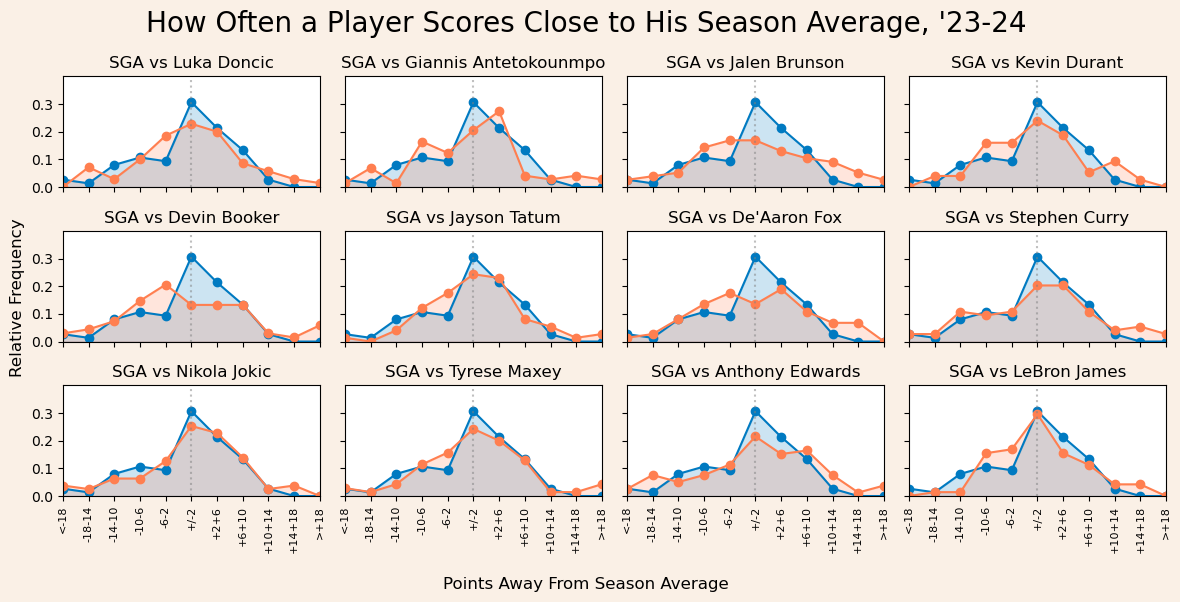

In [66]:
"""gamelog distributions for 2022-23"""

"""get top 13 (12 + Shai) qualified scorers from 2023-24"""
topscorers_2324 = scorers_summary[scorers_summary['year'] == '2023-24'].sort_values(by=['ppg_ave'], ascending=False)[0:13]


"""get info for Shai's distribution and calc pts off average"""
shai_ID = topscorers_2324[topscorers_2324['name'] == 'Shai Gilgeous-Alexander']['player_id'].item()
from nba_api.stats.endpoints import playergamelog
shai_log = playergamelog.PlayerGameLog(player_id=shai_ID).get_data_frames()[0]
shai_avg = shai_log['PTS'].mean()
shai_log['PTS_diff'] = shai_log['PTS'] - shai_avg


"""instead of the more logical bar plot, trying a line plot with bins of 4 pts"""
import numpy as np
conditions = [
    (shai_log['PTS_diff'].between(-100,-18)),
    (shai_log['PTS_diff'].between(-18,-14)),
    (shai_log['PTS_diff'].between(-14,-10)),
    (shai_log['PTS_diff'].between(-10,-6)),
    (shai_log['PTS_diff'].between(-6,-2)),
    (shai_log['PTS_diff'].between(-2,2)),
    (shai_log['PTS_diff'].between(2,6)),
    (shai_log['PTS_diff'].between(6,10)),
    (shai_log['PTS_diff'].between(10,14)),
    (shai_log['PTS_diff'].between(14,18)),
    (shai_log['PTS_diff'].between(18,100))
]
choices = ['<-18', '-18-14', '-14-10', '-10-6', '-6-2', '+/-2', '+2+6', '+6+10', '+10+14', '+14+18', '>+18']
shai_log['diff_bin'] = np.select(conditions, choices, default='ERROR')

# count the results of each bin
shai_dict = shai_log['diff_bin'].value_counts(normalize=True).sort_values().to_dict()

# sort the results of the bin using comprehension (if key is in dict)
shai_keys = [key for key in choices]
shai_values = [shai_dict.get(key, 0) for key in shai_keys]

"""grid of 12 images, comparing each of the other top scorers to shai's distribution in a loop"""
fig, axs = plt.subplots(3, 4, figsize=(12, 6), sharex=True, sharey=True, facecolor=('linen'))

ids_list = list(topscorers_2324.loc[topscorers_2324[topscorers_2324['name'] != 'Shai Gilgeous-Alexander'].index, 'player_id'])

for i, ax in enumerate(axs.flatten()):
    player_ID = ids_list[i]
    player_name = topscorers_2324[topscorers_2324['player_id'] == player_ID]['name'].item()
    from nba_api.stats.endpoints import playergamelog

    player_log = playergamelog.PlayerGameLog(player_id=player_ID).get_data_frames()[0]
    player_avg = player_log['PTS'].mean()

    player_log['PTS_diff'] = player_log['PTS'] - player_avg

    import numpy as np

    conditions = [
        (player_log['PTS_diff'].between(-100, -18)),
        (player_log['PTS_diff'].between(-18, -14)),
        (player_log['PTS_diff'].between(-14, -10)),
        (player_log['PTS_diff'].between(-10, -6)),
        (player_log['PTS_diff'].between(-6, -2)),
        (player_log['PTS_diff'].between(-2, 2)),
        (player_log['PTS_diff'].between(2, 6)),
        (player_log['PTS_diff'].between(6, 10)),
        (player_log['PTS_diff'].between(10, 14)),
        (player_log['PTS_diff'].between(14, 18)),
        (player_log['PTS_diff'].between(18, 100))
    ]
    choices = ['<-18', '-18-14', '-14-10', '-10-6', '-6-2', '+/-2', '+2+6', '+6+10', '+10+14', '+14+18', '>+18']
    player_log['diff_bin'] = np.select(conditions, choices, default='ERROR')

    # count the results of each bin
    player_dict = player_log['diff_bin'].value_counts(normalize=True).sort_values().to_dict()

    # sort the results of the bin using comprehension (if key is in dict)
    sorted_keys = [key for key in choices]
    sorted_values = [player_dict.get(key, 0) for key in sorted_keys]

    import matplotlib.pyplot as plt

    ax.plot(shai_keys, shai_values, color='#007AC1', marker='o')
    ax.fill_between(x=shai_keys, y1=0, y2=shai_values, color='#007AC1', alpha=.2)
    ax.plot(sorted_keys, sorted_values, color='#FF7F50', marker='o')
    ax.fill_between(x=sorted_keys, y1=0, y2=sorted_values, color='#FF7F50', alpha=.2)
    ax.axvline(x='+/-2', color='grey', linestyle='dotted', alpha=.5)
    # could maybe use this for ylim below max(max(sorted_values), max(sorted_values)) + .1
    ax.set_ylim(0, .4)
    ax.set_xlim('<-18', '>+18')
    ax.set_title(f"SGA vs {player_name}")

for ax in axs.flatten():
    plt.sca(ax)
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks([0, .1, .2, .3])

# fig.xlabel("Points away from season PPG")
# fig.ylabel("Relative Frequency")

fig.supxlabel('Points Away From Season Average')
fig.supylabel('Relative Frequency')
fig.suptitle("How Often a Player Scores Close to His Season Average, '23-24", fontsize=20)
plt.tight_layout()
plt.show()

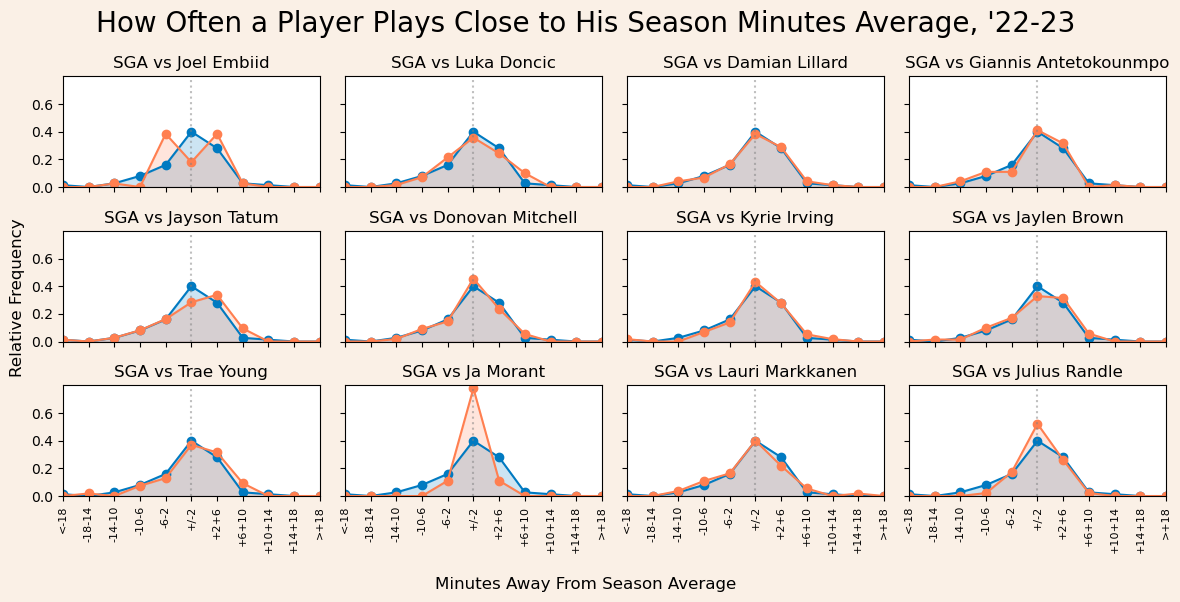

In [64]:
"""gamelog distributions for 2022-23"""

"""get top 13 (12 + Shai) qualified scorers from 2022-23"""
topscorers_2223 = scorers_summary[scorers_summary['year'] == '2022-23'].sort_values(by=['ppg_ave'], ascending=False)[0:13]


"""get info for Shai's distribution and calc pts off average"""
shai_ID = topscorers_2223[topscorers_2223['name'] == 'Shai Gilgeous-Alexander']['player_id'].item()
from nba_api.stats.endpoints import playergamelog
shai_log = playergamelog.PlayerGameLog(player_id=shai_ID).get_data_frames()[0]
shai_avg = shai_log['MIN'].mean()
shai_log['MIN_diff'] = shai_log['MIN'] - shai_avg


"""instead of the more logical bar plot, trying a line plot with bins of 4 pts"""
import numpy as np
conditions = [
    (shai_log['MIN_diff'].between(-100,-18)),
    (shai_log['MIN_diff'].between(-18,-14)),
    (shai_log['MIN_diff'].between(-14,-10)),
    (shai_log['MIN_diff'].between(-10,-6)),
    (shai_log['MIN_diff'].between(-6,-2)),
    (shai_log['MIN_diff'].between(-2,2)),
    (shai_log['MIN_diff'].between(2,6)),
    (shai_log['MIN_diff'].between(6,10)),
    (shai_log['MIN_diff'].between(10,14)),
    (shai_log['MIN_diff'].between(14,18)),
    (shai_log['MIN_diff'].between(18,100))
]
choices = ['<-18', '-18-14', '-14-10', '-10-6', '-6-2', '+/-2', '+2+6', '+6+10', '+10+14', '+14+18', '>+18']
shai_log['diff_bin'] = np.select(conditions, choices, default='ERROR')

# count the results of each bin
shai_dict = shai_log['diff_bin'].value_counts(normalize=True).sort_values().to_dict()

# sort the results of the bin using comprehension (if key is in dict)
shai_keys = [key for key in choices]
shai_values = [shai_dict.get(key, 0) for key in shai_keys]

"""grid of 12 images, comparing each of the other top scorers to shai's distribution in a loop"""
fig, axs = plt.subplots(3, 4, figsize=(12, 6), sharex=True, sharey=True, facecolor=('linen'))

ids_list = list(topscorers_2223.loc[topscorers_2223[topscorers_2223['name'] != 'Shai Gilgeous-Alexander'].index, 'player_id'])

for i, ax in enumerate(axs.flatten()):
    player_ID = ids_list[i]
    player_name = topscorers_2223[topscorers_2223['player_id'] == player_ID]['name'].item()
    from nba_api.stats.endpoints import playergamelog

    player_log = playergamelog.PlayerGameLog(player_id=player_ID).get_data_frames()[0]
    player_avg = player_log['MIN'].mean()

    player_log['MIN_diff'] = player_log['MIN'] - player_avg

    import numpy as np

    conditions = [
        (player_log['MIN_diff'].between(-100, -18)),
        (player_log['MIN_diff'].between(-18, -14)),
        (player_log['MIN_diff'].between(-14, -10)),
        (player_log['MIN_diff'].between(-10, -6)),
        (player_log['MIN_diff'].between(-6, -2)),
        (player_log['MIN_diff'].between(-2, 2)),
        (player_log['MIN_diff'].between(2, 6)),
        (player_log['MIN_diff'].between(6, 10)),
        (player_log['MIN_diff'].between(10, 14)),
        (player_log['MIN_diff'].between(14, 18)),
        (player_log['MIN_diff'].between(18, 100))
    ]
    choices = ['<-18', '-18-14', '-14-10', '-10-6', '-6-2', '+/-2', '+2+6', '+6+10', '+10+14', '+14+18', '>+18']
    player_log['diff_bin'] = np.select(conditions, choices, default='ERROR')

    # count the results of each bin
    player_dict = player_log['diff_bin'].value_counts(normalize=True).sort_values().to_dict()

    # sort the results of the bin using comprehension (if key is in dict)
    sorted_keys = [key for key in choices]
    sorted_values = [player_dict.get(key, 0) for key in sorted_keys]

    import matplotlib.pyplot as plt

    ax.plot(shai_keys, shai_values, color='#007AC1', marker='o')
    ax.fill_between(x=shai_keys, y1=0, y2=shai_values, color='#007AC1', alpha=.2)
    ax.plot(sorted_keys, sorted_values, color='#FF7F50', marker='o')
    ax.fill_between(x=sorted_keys, y1=0, y2=sorted_values, color='#FF7F50', alpha=.2)
    ax.axvline(x='+/-2', color='grey', linestyle='dotted', alpha=.5)
    # could maybe use this for ylim below max(max(sorted_values), max(sorted_values)) + .1
    ax.set_ylim(0, .8)
    ax.set_xlim('<-18', '>+18')
    ax.set_title(f"SGA vs {player_name}")

for ax in axs.flatten():
    plt.sca(ax)
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks([0, .2, .4, .6])

# fig.xlabel("Points away from season PPG")
# fig.ylabel("Relative Frequency")

fig.supxlabel('Minutes Away From Season Average')
fig.supylabel('Relative Frequency')
fig.suptitle("How Often a Player Plays Close to His Season Minutes Average, '22-23", fontsize=20)
plt.tight_layout()
plt.show()

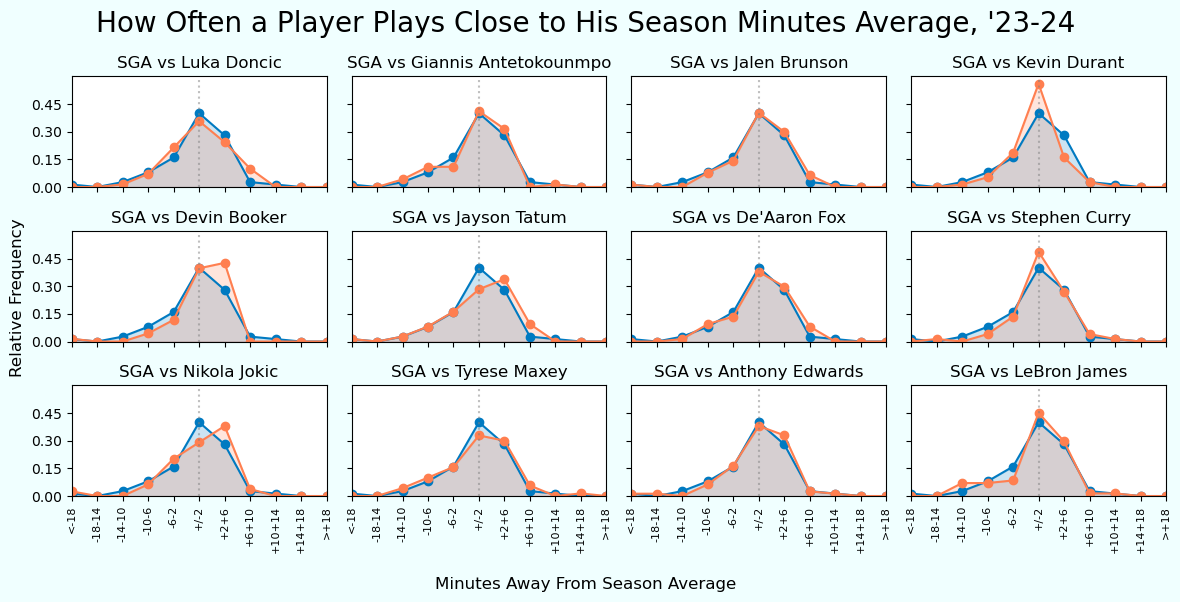

In [62]:
"""gamelog distributions for 2023-24"""

"""get top 13 (12 + Shai) qualified scorers from 2023-24"""
topscorers_2324 = scorers_summary[scorers_summary['year'] == '2023-24'].sort_values(by=['ppg_ave'], ascending=False)[0:13]


"""get info for Shai's distribution and calc pts off average"""
shai_ID = topscorers_2324[topscorers_2324['name'] == 'Shai Gilgeous-Alexander']['player_id'].item()
from nba_api.stats.endpoints import playergamelog
shai_log = playergamelog.PlayerGameLog(player_id=shai_ID).get_data_frames()[0]
shai_avg = shai_log['MIN'].mean()
shai_log['MIN_diff'] = shai_log['MIN'] - shai_avg


"""instead of the more logical bar plot, trying a line plot with bins of 4 pts"""
import numpy as np
conditions = [
    (shai_log['MIN_diff'].between(-100,-18)),
    (shai_log['MIN_diff'].between(-18,-14)),
    (shai_log['MIN_diff'].between(-14,-10)),
    (shai_log['MIN_diff'].between(-10,-6)),
    (shai_log['MIN_diff'].between(-6,-2)),
    (shai_log['MIN_diff'].between(-2,2)),
    (shai_log['MIN_diff'].between(2,6)),
    (shai_log['MIN_diff'].between(6,10)),
    (shai_log['MIN_diff'].between(10,14)),
    (shai_log['MIN_diff'].between(14,18)),
    (shai_log['MIN_diff'].between(18,100))
]
choices = ['<-18', '-18-14', '-14-10', '-10-6', '-6-2', '+/-2', '+2+6', '+6+10', '+10+14', '+14+18', '>+18']
shai_log['diff_bin'] = np.select(conditions, choices, default='ERROR')

# count the results of each bin
shai_dict = shai_log['diff_bin'].value_counts(normalize=True).sort_values().to_dict()

# sort the results of the bin using comprehension (if key is in dict)
shai_keys = [key for key in choices]
shai_values = [shai_dict.get(key, 0) for key in shai_keys]

"""grid of 12 images, comparing each of the other top scorers to shai's distribution in a loop"""
fig, axs = plt.subplots(3, 4, figsize=(12, 6), sharex=True, sharey=True, facecolor=('azure'))

ids_list = list(topscorers_2324.loc[topscorers_2324[topscorers_2324['name'] != 'Shai Gilgeous-Alexander'].index, 'player_id'])

for i, ax in enumerate(axs.flatten()):
    player_ID = ids_list[i]
    player_name = topscorers_2324[topscorers_2324['player_id'] == player_ID]['name'].item()
    from nba_api.stats.endpoints import playergamelog

    player_log = playergamelog.PlayerGameLog(player_id=player_ID).get_data_frames()[0]
    player_avg = player_log['MIN'].mean()

    player_log['MIN_diff'] = player_log['MIN'] - player_avg

    import numpy as np

    conditions = [
        (player_log['MIN_diff'].between(-100, -18)),
        (player_log['MIN_diff'].between(-18, -14)),
        (player_log['MIN_diff'].between(-14, -10)),
        (player_log['MIN_diff'].between(-10, -6)),
        (player_log['MIN_diff'].between(-6, -2)),
        (player_log['MIN_diff'].between(-2, 2)),
        (player_log['MIN_diff'].between(2, 6)),
        (player_log['MIN_diff'].between(6, 10)),
        (player_log['MIN_diff'].between(10, 14)),
        (player_log['MIN_diff'].between(14, 18)),
        (player_log['MIN_diff'].between(18, 100))
    ]
    choices = ['<-18', '-18-14', '-14-10', '-10-6', '-6-2', '+/-2', '+2+6', '+6+10', '+10+14', '+14+18', '>+18']
    player_log['diff_bin'] = np.select(conditions, choices, default='ERROR')

    # count the results of each bin
    player_dict = player_log['diff_bin'].value_counts(normalize=True).sort_values().to_dict()

    # sort the results of the bin using comprehension (if key is in dict)
    sorted_keys = [key for key in choices]
    sorted_values = [player_dict.get(key, 0) for key in sorted_keys]

    import matplotlib.pyplot as plt

    ax.plot(shai_keys, shai_values, color='#007AC1', marker='o')
    ax.fill_between(x=shai_keys, y1=0, y2=shai_values, color='#007AC1', alpha=.2)
    ax.plot(sorted_keys, sorted_values, color='#FF7F50', marker='o')
    ax.fill_between(x=sorted_keys, y1=0, y2=sorted_values, color='#FF7F50', alpha=.2)
    ax.axvline(x='+/-2', color='grey', linestyle='dotted', alpha=.5)
    # could maybe use this for ylim below max(max(sorted_values), max(sorted_values)) + .1
    ax.set_ylim(0, .6)
    ax.set_xlim('<-18', '>+18')
    ax.set_title(f"SGA vs {player_name}")

for ax in axs.flatten():
    plt.sca(ax)
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks([0, .15, .3, .45])

# fig.xlabel("Points away from season PPG")
# fig.ylabel("Relative Frequency")

fig.supxlabel('Minutes Away From Season Average')
fig.supylabel('Relative Frequency')
fig.suptitle("How Often a Player Plays Close to His Season Minutes Average, '23-24", fontsize=20)
plt.tight_layout()
plt.show()

Notable takeaways. 
Closest minutes distribution: '23/24 brunson, fox; '22/23 dame, kyrie. 
More consistent minutes than SGA: '23/24 kd, lebron, steph, book?; '22/23 ja, randle. 
Anecdotal analysis comparing mpg, ppg, ppm for sga vs all these.

Too lazy to make these direct comparisons but will do later. Also, change the awful color backgrounds for most of these charts. Label '22 or '23 for the blue-dot SGA points (will be useful for MPG).